# Data Analysis and Machine Learning FYS-STK3155/FYS4155 - Project 1 

### Franke function 


\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}


In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed 

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

In [2]:
X = np.arange(0, 1, 0.004)
Y = np.arange(0, 1, 0.004)

n = np.size(X, 0)

In [3]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [4]:
def FindData(x , y):    
    #Franke funksjonen trenger et to dimensjonalt nett av variabler, meshgrid: 
    x_d, y_d = np.meshgrid(x,y)
    z_d = FrankeFunction(x_d, y_d) #+ 0.05*np.random.randn(n,n)  #+random noise  0.05*np.random.randn(100, 100) 
    return x_d, y_d, z_d 

In [5]:
def convertData(x_d, y_d, z_d):
    #Strekker ut matrisene
    x = x_d.reshape(-1,1)  
    y = y_d.reshape(-1,1)
    z = z_d.reshape(-1,1)
    
    # returnerer også lengden (antall rader) til den nye utstrakte vektoren
    n = np.size(x, 0)
    
    return (x, y, z, n)

In [6]:
def plotSurface(x_d, y_d, z_d):
    # Kode for å plotte overflater, basert på oppgaveteksten 
    fig = plt.figure()
    ax = fig.gca(projection='3d')   
   
    surf = ax.plot_surface(x_d, y_d, z_d, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z - Franke')
    
    # Add a color bar which maps values to colors.
    clb = fig.colorbar(surf, shrink=0.5, aspect=5)
    clb.ax.set_title('Level')

    plt.show()

In [7]:
def XY(x,y):
    # Oppretter designmatrisen/Vandermondes
    xyb = np.c_[np.ones((x.shape)), x, y, x**2, x*y, y**2, x**3, x**2*y, x*y**2, y**3, x**4, x**3*y, x**2*y**2, x*y**3,y**4,
           x**5, x**4*y, x**3*y**2, x**2*y**3, x*y**4, y**5]
    #print(xyb.shape)
    return xyb

In [8]:
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 
def XYsklearn(degreePoly, X,Y): 

    # Oppretter meshgrid av datasettet 
    x_d, y_d, z_d = FindData(X , Y) 
    # Plotter z_d med meshgrid av x og y
    plotSurface(x_d, y_d, z_d) 

    # Konverterer meshgrid til kolonnevektorer
    x, y, z, m = convertData(x_d, y_d, z_d)
    
    # Oppretter independent variabel matrise av x og y vektorene
    independent_multi = [x,y]
    #np.c_[x, y]

    # Bruker sklearn for å finne Lasso-modell. Bruker PolynomialFeatures for ikke lineær funksjon
    poly2 = PolynomialFeatures(degree=degreePoly)
    # Transformerer variabelmatrisen 
    poly_sklearn = poly2.fit_transform(independent_multi)

    # Beregner Lasso modell 
    #lasso=linear_model.Lasso(alpha=0.001)
    #lasso.fit(Lasso_sklearn, z_Lasso) 

    # beregner forventet z-verdier av x og y verdier
    #predictLasso = lasso.predict(Lasso_sklearn)

    return poly_sklearn

In [9]:
def beta_model(model, xyb, z):
    if (model == 'Linear'): 
        # betaLinear: 
        betaLinear = np.linalg.inv(xyb.T.dot(xyb)).dot(xyb.T).dot(z) 
        return betaLinear
    elif (model == 'Ridge'):
        I = np.identity(np.size(xyb, 1)) 
        lambda_R = 0.5
        betaRidge = np.linalg.inv(xyb.T.dot(xyb) + lambda_R*(I)).dot(xyb.T).dot(z)
        return betaRidge 
    elif (model == 'Lasso'):
        #betaLasso = 
        return betaLasso

In [10]:
#trener modellen: 
def predict(xyb,beta,n):
    # Finner utregnet forventet model. 
    zpredict = xyb.dot(beta)
    
    # shapen til x og y må ha like mange punkter, bruker derfor x_d.shape = y_d.shape
    zpredict_mesh = zpredict.reshape(n,n)
    return zpredict, zpredict_mesh

#### Statistical 

In [11]:
def mu(z,n):
    #gjennomsnittsverdien 
    z_mean = (1/n ) * np.sum(z)
    return z_mean
  
def calc_Variance(z, z_mu,n):
    #Sample variance: 
    var_z = (1/n)* sum((z-z_mu)**2) 
    return var_z
        
def MSE(z, z_tilde, n):
    #Mean Squared Error: z = true value, z_tilde = forventet z utifra modell  
    MSE = (1/n)*(sum(z-z_tilde)**2)
    #error = np.mean( np.mean((z - z_tilde)**2, axis=1, keepdims=True) )

    return MSE        
        
def calc_R_2(z, z_tilde, z_mean, n):
    R_2 = 1- ((sum(z.reshape(-1,1)-z_tilde)**2)/(sum((z-z_mean)**2)))
    return R_2

def MSEk(z, z_tilde, n):
    MSE = (1/n)*(sum((z-z_tilde)**2))
    return MSE    

In [12]:
def sigma_2(xyb, z_true, z_predict, N, p): 
    sigma2 = (1/(N-(p-1 )))* (sum(z_true-z_predict)**2)
    
    varBeta = np.linalg.inv(xyb.T.dot(xyb))* sigma2#**2
    
    #Intervall betacoefisienter: 
    s_beta_c_int = np.sqrt(np.diag(varBeta))
    
    return  s_beta_c_int

In [13]:
# Finner Confidens Intervallet
def confidenceIntervall(z_true, z_predict, N, p, xyb, beta):     
    #N = z punkter , p = ant polynom. 
    
    sigma2 = (1/(N-(p-1 ))) * (sum((z_true-z_predict)**2))
    # Betas varians:
    varBeta = np.linalg.inv((xyb.T.dot(xyb)))* sigma2 
    
    # estimert standardavvik pr beta.
    # Må forklares i rapport hvorfor man velger å gjøre det slik og ikke på andre måter. 
    betaCoeff = (np.sqrt(np.diag(varBeta))).reshape(-1,1)
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-betaCoeff, beta+betaCoeff]    
    return beta, betaCoeff, beta_confInt 

In [14]:
def confidenceIntervall2(z_true, N, p, xyb, beta):     
    #N = z punkter , p = ant polynom. 
    z_mean = (1/N ) * np.sum(z_true)
    sigma2 = (1/(N-(p-1 ))) * (sum((z_true-z_mean)**2))
    # Betas varians:
    varBeta = np.linalg.inv((xyb.T.dot(xyb)))* sigma2 
    
    # estimert standardavvik pr beta.
    # Må forklares i rapport hvorfor man velger å gjøre det slik og ikke på andre måter. 
    betaCoeff = (np.sqrt(np.diag(varBeta))).reshape(-1,1)
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-betaCoeff, beta+betaCoeff]    
    return beta, betaCoeff, beta_confInt 

In [15]:
# Finner modellens bias og varians:
def bias(z_true, z_predict, N):    
    bias2 = np.sum((z_true - np.mean(z_predict))**2 )/N
    #bias = np.mean( (z_true - np.mean(z_predict, axis=1, keepdims=True))**2 )
    return bias2

def var2(z_predict, N): 
    var = np.sum((z_predict - np.mean(z_predict))**2)/N
    #variance = np.mean( np.var(z_predict, axis=1, keepdims=True) )
    return var

### Oppretter train/testdata: 

In [16]:
# deler datasettet i tre. en testdel og resten train. 30/70 
def test2(x,y,z, model): 
    # Oppretter en matrise av x, y og z. Datasettet deles deretter i test og train. 
    data1 = np.concatenate((x, y), axis = 1) 
    #data2 = z
    # Splitter datasettet i to test og train .Test er et valideringssett og 
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(data1, z, test_size=0.2)
    
    #x_test og y_test er valideringspunktene som skal brukes for å finne biasene. 
    # Henter validerings designmatrisa: 
    
    xybvalidering = XY(x_test[:,0],x_test[:,1])
    print(xybvalidering.shape)
    
    data = np.concatenate((x_train, y_train), axis = 1) 
    #print(data.shape)
    n = np.size(data, 0) #rader
    m = np.size(data, 1) #kolonner
    
    # Shuffle dataset: 
    np.random.shuffle(data)
    
    # datasettet deles i 3 - en del test og to treningsdel 
    split_dataset = np.array_split(data,3) 
    test = split_dataset[0]
    train = np.concatenate((split_dataset[1], split_dataset[2]), axis = 0)
        
    # TRENING: 
    # Når hele datasettet er gått igjennom en hel iterasjon så trener man på train settet 
    #1. Finner designmatrisen, xyb: 
    xyb_train = XY(train[:,0],train[:,1])

    #2. Finner beta av treningsettet med treningsettets designmatrise og treningsdelens z-verdier.  
    beta = beta_model(model, xyb_train, train[:,2]) 

    # TEST:
    # Designmatrisen opprettes for testsettet 
    xyb_test = XY(test[:,0],test[:,1])

    nr =  np.size(test[:,2],0)
    

    # Finner forventet z_verdier for testsettet ved å bruke utregnet modell, beta, over og testsettets x og y verdier fra xyb-matrisa. 
    zpredict_test = xyb_test.dot(beta)
    zpredict_test_validering = xybvalidering.dot(beta)
    print(zpredict_test_validering.shape)
    Nval = np.size(zpredict_test_validering, 0)
    # regner ut mean squared error 
    mse = MSEk(test[:,2], zpredict_test, nr) 
    
    z_mean = (1/nr ) * np.sum(test[:,2])
    
    # Regner ut R_2 score:  
    R_2 = 1 - (((sum(test[:,2]-zpredict_test))**2)/(sum((test[:,2]-z_mean)**2)))
           
    betaCoeff = sigma_2(xyb_test,test[:,2], zpredict_test, nr, 5)
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-betaCoeff, beta+betaCoeff]
    
    #bias: y_test er valideringspunktene z. 
    biasModel = np.mean((y_test - (zpredict_test_validering))**2 )

    #bias(y_test, zpredict_test_validering, Nval)
    #varians: 
    var = var2(zpredict_test, nr)
    #plt.scatter(test[:,0], test[:,1], test[:,2], label='Data points')
    #error = np.mean(np.mean((test[:,2] - zpredict_test)**2, axis=1, keepdims=True) )
    
    #plt.plot(test[:,0], test[:,2], label='f(x)')
    #plt.scatter(x_test, y_test, label='Data points')
    #plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')

    #plt.scatter(test[:,0::10000], test[:,2::10000], label='Data points')
    #plt.scatter(test[:,0::10000], np.mean(zpredict_test), label='Pred') 
    #plt.show()
    #plt.scatter(test[:,0], test[:,1], np.mean(zpredict_test, axis=1), label='Pred')
    
    #print (beta_confInt )
    return mse, R_2, biasModel, var, beta_confInt     

In [17]:
# deler datasettet i tre. en testdel og resten train. 30/70 
def test(x,y,z, model): 
    # Oppretter en matrise av x, y og z. Datasettet deles deretter i test og train. 
    data = np.concatenate((x, y, z), axis = 1) 
    
    n = np.size(data, 0) #rader
    m = np.size(data, 1) #kolonner
    
    # Shuffle dataset: 
    np.random.shuffle(data)
    
    # datasettet deles i 3 - en del test og to treningsdel 
    split_dataset = np.array_split(data,3) 
    test = split_dataset[0]
    train = np.concatenate((split_dataset[1], split_dataset[2]), axis = 0)
        
    # TRENING: 
    # Når hele datasettet er gått igjennom en hel iterasjon så trener man på train settet 
    #1. Finner designmatrisen, xyb: 
    xyb_train = XY(train[:,0],train[:,1])

    #2. Finner beta av treningsettet med treningsettets designmatrise og treningsdelens z-verdier.  
    beta = beta_model(model, xyb_train, train[:,2]) 

    # TEST:
    # Designmatrisen opprettes for testsettet 
    xyb_test = XY(test[:,0],test[:,1])

    nr =  np.size(test[:,2],0)

    # Finner forventet z_verdier for testsettet ved å bruke utregnet modell, beta, over og testsettets x og y verdier fra xyb-matrisa. 
    zpredict_test = xyb_test.dot(beta)
    
    # regner ut mean squared error 
    mse = MSEk(test[:,2], zpredict_test, nr) 
    
    z_mean = (1/nr ) * np.sum(test[:,2])
    
    # Regner ut R_2 score:  
    R_2 = 1 - (((sum(test[:,2]-zpredict_test))**2)/(sum((test[:,2]-z_mean)**2)))
           
    betaCoeff = sigma_2(xyb_test,test[:,2], zpredict_test, nr, 5)
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-betaCoeff, beta+betaCoeff]
    
    #bias: 
    biasModel = bias(test[:,2], zpredict_test, nr)
    #varians: 
    
    #calc_Variance
    
    var = var2(zpredict_test, nr)
    #plt.scatter(test[:,0], test[:,1], test[:,2], label='Data points')
    #error = np.mean(np.mean((test[:,2] - zpredict_test)**2, axis=1, keepdims=True) )
    
    #plt.plot(test[:,0], test[:,2], label='f(x)')
    #plt.scatter(x_test, y_test, label='Data points')
    #plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')

    #plt.scatter(test[:,0::10000], test[:,2::10000], label='Data points')
    #plt.scatter(test[:,0::10000], np.mean(zpredict_test), label='Pred') 
    #plt.show()
    #plt.scatter(test[:,0], test[:,1], np.mean(zpredict_test, axis=1), label='Pred')
    
    #print (beta_confInt )
    return mse, R_2, biasModel, var, beta_confInt     

### Cross-Validation
#### K-fold 

In [18]:
def test_k_fold(x,y,z, k, model): 
    # Oppretter en matrise av x, y og z. Datasettet som skal crossvalideres
    size =(k,1)
    biasModel = np.zeros(size)
    data1 = np.concatenate((x, y), axis = 1) 
    #data2 = z
    # Splitter datasettet i to test og train .Test i dette tilfellet er et valideringssett og inndelingen: 
    #25% validering og resten train som videre deles inn i 25% test og resten treining for å finne beta. 
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(data1, z, test_size=0.25)
    
    #x_test og y_test er valideringspunktene som skal brukes for å finne biasene. 
    # Henter validerings designmatrisa: 
    xybvalidering = XY(x_test[:,0],x_test[:,1])
    #print(xybvalidering.shape)
    
    data = np.concatenate((x_train, y_train), axis = 1) 

    n = np.size(data, 0) #rader
    m = np.size(data, 1) #kolonner

    # Shuffle dataset: 
    np.random.shuffle(data)

    mse = 0
    r2 = 0
    
    betaCoeff = 0
    bias = 0 
    varianceModel = 0 
    biasModelk = 0
    
    #splitter dataset i k like deler. Oppretter antall folder. Bruker array_split. Da blir k deler blir ikke eksakt like,
    #men tilnærmet like, stort datasett gir lite forskjell. 
    split_dataset = np.array_split(data,k) 
    #Definerer alle k gangene datasettet skal deles opp. 
    for i in range(0, k): 
        # resetter train før hver oppdeling av datasettet.  
        train = np.zeros((0,3))

        # j definerer selve splittdelene og man bestemmer her om del j er en trenings eller test del. 
        for j in range(0,k): 
            if j == i:
                test = split_dataset[j]
                continue
            train = np.concatenate((train, split_dataset[j]), axis = 0)
        #print(train.shape)
        
        # TRENING: 
        # Når hele datasettet er gått igjennom en hel iterasjon så trener man på train settet 
        #1. Finner designmatrisen, xyb: 
        xyb_train = XY(train[:,0],train[:,1])
        
        #2. Finner beta av treningsettet med treningsettets designmatrise og treningsdelens z-verdier.  
        # finner beta for sett nr i 
        beta = beta_model(model, xyb_train, train[:,2]) 
        
        # VALIDERING 
        # Finner Z_k- denne skal sjekkes mot z_validering og regne ut den totalebiasen etterhvert 
        zpredict_test_validering = xybvalidering.dot(beta)
        #print(zpredict_test_validering.shape)
        Nval = np.size(zpredict_test_validering, 0)
        
        # TEST:
        # Designmatrisen opprettes for testsettet 
        xyb_test = XY(test[:,0],test[:,1])
        
        nr =  np.size(test[:,2],0)

        # Finner forventet z_verdier for testsettet ved å bruke utregnet modell, beta, over og testsettets x og y verdier fra xyb-matrisa. 
        zpredict_test = xyb_test.dot(beta)
        #zTruek[i] = test[:,2]
        #print(test[:,2].shape)
        #np.concatenate((zpredict_test[i], ), axis=0)
        
        # regner ut mean squared error pr fold  
        #part_mse = MSEk(test[:,2], zpredict_test, nr) 
        #FOR VALIDERINGSSETTET: 
        # Finner part error pr fold. Førs finne meansquared pr z og deretter mean av dette: 
        part_mse = np.mean(MSEk(y_test, zpredict_test_validering, Nval)) 
        
        #For testsettet: 
        #part_mse = np.mean(MSEk(test[:,2], zpredict_test, nr)) 

        
        print(part_mse)
    
        
        
#       part_mse = 
        #part_mse = MSE(test[:,2], zpredict_test, nr) 
        #error 
        #part_mse = np.mean(np.mean((test[:,2] - zpredict_test)**2) )

        mse = mse + part_mse

        z_mean = (1/nr ) * np.sum(test[:,2])
        
        # Regner ut R_2 score pr fold:   
        R_2 = 1 - (((sum(test[:,2]-zpredict_test))**2)/(sum((test[:,2]-z_mean)**2)))
        r2 = r2 + R_2
        
        #Finner betacoeffisientenes varians 
        betaCoeffpart = sigma_2(xyb_test,test[:,2], zpredict_test, nr, 5)
        
        betaCoeff = betaCoeff + betaCoeffpart         
        
        #bias: 
 
        #varians: 
        #var = var2(zpredict_test, nr)
        varpart = var2(zpredict_test_validering, Nval)

        #biaspart = bias(test[:,2], zpredict_test, nr)
        #varians: 
        
        #varpart = var2(zpredict_test, nr)
        
        print(varpart)     
        varianceModel = varianceModel + varpart
        biasModel[i] = np.mean((y_test - (zpredict_test_validering))**2 )
        #print(biasModel[i])
        #plt.scatter(test[:,0], test[:,1], test[:,2], label='Data points')
        #plt.scatter(test[:,0], test[:,1], np.mean(zpredict_test, axis=1), label='Pred')
        #biaspart = 
        #resetter: 
        
        for a in range(0, k):
            if a == 0: 
                zpredbias = zpredict_test
                ztruebias = test[:,2]
            else: 
                zpredbias = np.concatenate((zpredbias, zpredict_test), axis = 0) 
                ztruebias = np.concatenate((ztruebias, test[:,2]), axis = 0) 
        varpart = 0
        betaCoeffpart = 0
        part_mse = 0
        nr = 0
        R_2 = 0
    #print(zpredbias.shape)
    #print(ztruebias.shape)
    #Nbias = np.size(ztruebias,0)
        
    # Beregnet mean squared error og R_2 etter cross-validation med k-fold :
    total_MSE = (mse/k)
    total_R_2 = (r2/k)
    #bias: 
    #biasModelk = bias(ztruebias[:,0] , zpredbias[:,0] , Nbias)
    #biasModelk = bias(ztruebias, zpredbias, Nbias)

    #biasModelk = np.mean((ztruebias - np.mean(zpredbias))**2 )
    #print (biasModel) 
    totVarianceModel = varianceModel/k
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-(betaCoeff/k), beta+(betaCoeff/k)]
    return total_MSE, total_R_2, totVarianceModel , beta_confInt, biasModel

In [19]:
def k_fold_Lasso(x,y,z, k, Lasso_alpha): 
    # Oppretter en matrise av x, y og z. Datasettet som skal crossvalideres
    data = np.concatenate((x, y, z), axis = 1) 

    n = np.size(data, 0) #rader
    m = np.size(data, 1) #kolonner

    # Shuffle dataset: 
    np.random.shuffle(data)

    mse = 0
    r2 = 0
    
    #splitter dataset i k like deler. Oppretter antall folder. Bruker array_split. Da blir k deler blir ikke eksakt like,
    #men tilnærmet like, stort datasett gir lite forskjell. 
    split_dataset = np.array_split(data,k) 
    #Definerer alle k gangene datasettet skal deles opp. 
    for i in range(0, k): 
        # resetter train før hver oppdeling av datasettet.  
        train = np.zeros((0,3))

        # j definerer selve splittdelene og man bestemmer her om del j er en trenings eller test del. 
        for j in range(0,k): 
            if j == i:
                test = split_dataset[j]
                continue
            train = np.concatenate((train, split_dataset[j]), axis = 0)
        print(train.shape)
        
        #Lasso_multi = np.c_[x_Lasso, y_Lasso]
        #Lasso_multi - Putter alt treningsettet i en multivariabel som sendes til sklearn sin Lassometode. 
        Lasso_multi = np.c_[train[:,0], train[:,1]]
        Lasso_multi_test = np.c_[test[:,0],test[:,1]]
        
        poly2 = PolynomialFeatures(degree=10)
        
        # Transformerer variabelmatrisen 
        Lasso_sklearn = poly2.fit_transform(Lasso_multi)
        Lasso_sklearn_test = poly2.fit_transform(Lasso_multi_test)

        #print(Lasso_sklearn)
        
        # Beregner Lasso modell 
        lasso = linear_model.Lasso(alpha=Lasso_alpha)
        lasso.fit(Lasso_sklearn, train[:,2]) 

        # beregner forventet z-verdier av x og y verdier
        zpredict_test_L = lasso.predict(Lasso_sklearn_test)
        
        nrx =  np.size(test[:,0],0)
        nry =  np.size(test[:,1],0)
        nr =  np.size(test[:,2],0)

        # Finner forventet z_verdier for testsettet ved å bruke utregnet modell, beta, over og testsettets x og y verdier fra xyb-matrisa. 
        
        
        # regner ut mean squared error pr fold  
        part_mse = MSEk(test[:,2], zpredict_test_L, nr) 
        mse = mse + part_mse
        
        z_mean = (1/nr ) * np.sum(test[:,2])
        
        # Regner ut R_2 score pr fold:   
        R_2 = 1 - (((sum(test[:,2]-zpredict_test_L))**2)/(sum((test[:,2]-z_mean)**2)))
        r2 = r2 + R_2
        
        #x_d = test[:,0].reshape(nrx,nrx)
        #y_d =test[:,1].reshape(nry,nry)
        #z_d = zpredict_test_L.reshape(nr,nr)
        
        #plotSurface(x_d, y_d, z_d)
        
        part_mse = 0
        nr = 0
        R_2 = 0
    # Beregnet mean squared error og R_2 etter cross-validation med k-fold :
    total_MSE = (mse/k)
    total_R_2 = (r2/k)
    return total_MSE, total_R_2

## Part a) 
### Linear Regression 

(250, 250)


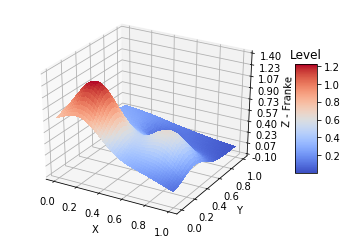

In [20]:
#Henter meshgrid verdier av datasettet 
x_d_OLS, y_d_OLS, z_d_OLS = FindData(X, Y) 
print(x_d_OLS.shape)
# Plotter ekte overflate 
plotSurface(x_d_OLS, y_d_OLS, z_d_OLS) 

In [21]:
#Konverterer meshgrideverdiene til kolonnevektorer
x_OLS,y_OLS,z_OLS,m_OLS = convertData(x_d_OLS, y_d_OLS, z_d_OLS)
print(m_OLS)
print(x_OLS.shape)
# Finner designmatrisen for datasettet 
xyb_Linear = XY(x_OLS,y_OLS) 
# Finner modellen 
betaLinear = beta_model('Linear', xyb_Linear, z_OLS) 
print(betaLinear.shape)

62500
(62500, 1)
(21, 1)


### Confidence Intervall med z_mean: 
Hvordan skal dette regnes ut og hva slags parametre skal velges. Brukes z_predict(confidenceIntervall) eller z_mean (confidenceIntervall2)? 

In [22]:
#print(confidenceIntervall2(z_OLS, m_OLS, 5, xyb_Linear, betaLinear ))

### Regner ut z_predict 

In [23]:
# regner ut forventet verdi ut ifra datasettet og forventet modell
zpredict_OLS, zpredict_OLS_mesh = predict(xyb_Linear,betaLinear,n)
print(zpredict_OLS.shape)

print(zpredict_OLS_mesh.shape)
print(n)

(62500, 1)
(250, 250)
250


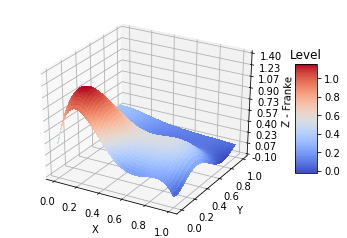

In [24]:
# Plotter forventet overflate  
plotSurface(x_d_OLS, y_d_OLS, zpredict_OLS_mesh)

### Confidence Intervall med z_predict: 

In [25]:
#betaCoeff = 
beta, betaCoeff, beta_confInt = confidenceIntervall(z_OLS, zpredict_OLS, m_OLS, 5, xyb_Linear, betaLinear )

print(betaCoeff) 
print(beta)

[[0.0030252 ]
 [0.03368669]
 [0.03368669]
 [0.16237028]
 [0.12686894]
 [0.16237028]
 [0.3651539 ]
 [0.27086476]
 [0.27086476]
 [0.3651539 ]
 [0.3824336 ]
 [0.29229254]
 [0.27208537]
 [0.29229254]
 [0.3824336 ]
 [0.15057123]
 [0.13103027]
 [0.12786017]
 [0.12786017]
 [0.13103027]
 [0.15057123]]
[[  0.38359657]
 [  7.94267297]
 [  3.87636858]
 [-34.45872345]
 [-15.47516698]
 [ -8.96755549]
 [ 47.89482466]
 [ 45.31689036]
 [ 21.3859254 ]
 [ -7.65086618]
 [-22.60705746]
 [-54.39054128]
 [ -7.88625491]
 [-30.61261916]
 [ 28.99898026]
 [  0.87617274]
 [ 19.51194634]
 [ 10.50598785]
 [ -5.18996586]
 [ 17.07823636]
 [-16.46899467]]


In [26]:
print(beta_confInt)

[[  0.38057137   0.38662177]
 [  7.90898627   7.97635966]
 [  3.84268189   3.91005528]
 [-34.62109373 -34.29635316]
 [-15.60203592 -15.34829804]
 [ -9.12992577  -8.8051852 ]
 [ 47.52967076  48.25997855]
 [ 45.0460256   45.58775512]
 [ 21.11506064  21.65679015]
 [ -8.01602008  -7.28571228]
 [-22.98949106 -22.22462386]
 [-54.68283382 -54.09824874]
 [ -8.15834028  -7.61416953]
 [-30.9049117  -30.32032662]
 [ 28.61654666  29.38141387]
 [  0.72560151   1.02674397]
 [ 19.38091607  19.64297661]
 [ 10.37812768  10.63384802]
 [ -5.31782603  -5.06210568]
 [ 16.94720609  17.20926663]
 [-16.6195659  -16.31842344]]


In [27]:
# Regner ut gjennomsnittsverdien, variansen, mean squared error og standardavviket 
z_mean_OLS = mu(z_OLS,m_OLS)
print(z_mean_OLS)   
var_z_OLS = calc_Variance(z_OLS,z_mean_OLS,m_OLS)
print(var_z_OLS)        
MSE_OLS = MSE(z_OLS, zpredict_OLS, m_OLS)
print(MSE_OLS)      
R_2_OLS = calc_R_2(z_OLS, zpredict_OLS, z_mean_OLS, m_OLS)
print(R_2_OLS)

0.40846842352769225
[0.08252045]
[7.53737436e-21]
[1.]


$$E[(y - \hat f(x))^2] = \text{Bias}(\hat f(x))^2 + \text{Var}(\hat f(x)) + \sigma^2 \\ = \left(E[f(x) - \hat f(x)]^2\right)+ \left(E[\hat f(x)^2] - E[\hat f(x)]^2\right) + \sigma^2$$

In [28]:
print(m_OLS)
print(xyb_Linear.shape)
print(betaLinear.shape)

62500
(62500, 21)
(21, 1)


### Resampler settet en gang

In [29]:
# #### Tester med nye random punkter: 

mse, R_2, biasModel, var, beta_confInt = test(x_OLS,y_OLS,z_OLS,'Linear')
print('Mean squared error: ', mse)
print('R 2- score: ', R_2)
print('bias for the model ', biasModel) 
print('Variancen for the model: ', var)
print('beta Confidence Intervall: \n', beta_confInt)

In [30]:
mse, R_2, biasModel, var, beta_confInt = test2(x_OLS,y_OLS,z_OLS,'Linear')
print('Mean squared error: ', mse)
print('R 2- score: ', R_2)
print('bias for the model ', biasModel) 
print('Variancen for the model: ', var)
print('beta Confidence Intervall: \n', beta_confInt)

(12500, 21)
(12500,)
Mean squared error:  0.0020770177512867273
R 2- score:  0.8153891043571083
bias for the model  0.16293184781136097
Variancen for the model:  0.08035389095349181
beta Confidence Intervall: 
 [[  0.35630195   0.38737151]
 [  7.87783221   8.22537723]
 [  3.75637705   4.11303313]
 [-35.718742   -34.02090104]
 [-16.45439029 -15.12827317]
 [ -9.96306365  -8.24206417]
 [ 46.73089489  50.57059737]
 [ 44.45195818  47.27324424]
 [ 20.42554917  23.29167765]
 [ -9.39597481  -5.52685684]
 [-25.29418242 -21.25925727]
 [-56.30180949 -53.22771849]
 [ -9.9044708   -7.04475943]
 [-32.35989146 -29.2586573 ]
 [ 26.78137619  30.83553672]
 [  0.30574642   1.89880733]
 [ 18.92988549  20.32233714]
 [  9.96970839  11.32052947]
 [ -5.64090615  -4.28650115]
 [ 16.35476427  17.74574085]
 [-17.17903076 -15.58126684]]


### Tester med crossvalidation: 

In [31]:
total_MSE, total_R_2, totVarianceModel , beta_confInt, biasModelk = test_k_fold(x_OLS,y_OLS,z_OLS, 3, 'Linear')
print('Mean squared error: ', total_MSE)
print('R 2- score: ', total_R_2)
print('bias for the model ', biasModelk) 
print('Variancen for the model: ', totVarianceModel)
print('beta Confidence Intervall: \n', beta_confInt)

0.16325377183054812
0.08064337639728943
0.16324300774083603
0.08063261318041132
0.1631148585309636
0.08050441606841405
Mean squared error:  0.16320387936744926
R 2- score:  0.9786226045865947
bias for the model  [[0.16325377]
 [0.16324301]
 [0.16311486]]
Variancen for the model:  0.08059346854870493
beta Confidence Intervall: 
 [[  0.38210235   0.39259906]
 [  7.83419407   7.95189278]
 [  3.77111464   3.88835464]
 [-34.53143349 -33.96511719]
 [-15.41832209 -14.97763607]
 [ -9.12963541  -8.56300799]
 [ 46.80642876  48.07761065]
 [ 44.43028963  45.37484491]
 [ 20.32712636  21.26703212]
 [ -8.36491837  -7.09006445]
 [-22.81959025 -21.4892015 ]
 [-54.62938169 -53.61053812]
 [ -7.81628183  -6.87032538]
 [-30.66678324 -29.6510503 ]
 [ 28.28927828  29.62415072]
 [  0.45007898   0.97387059]
 [ 19.2218262   19.67764616]
 [ 10.06625893  10.51147874]
 [ -5.52420663  -5.07898921]
 [ 16.69135191  17.14764149]
 [-16.68477992 -16.15949452]]


In [32]:
#numberofK = np.size(biasModelk,0)
biasTotal = np.mean(biasModelk) #/numberofK 
print(biasTotal)

0.16320387936744948


In [33]:
print(z_OLS.shape)

(62500, 1)


#### Finn bias og variansen for modellene. 

$$E[(y - \hat f(x))^2] = \text{Bias}(\hat f(x))^2 + \text{Var}(\hat f(x)) + \sigma^2 \\ = \left(E[f(x) - \hat f(x)]^2\right)+ \left(E[\hat f(x)^2] - E[\hat f(x)]^2\right) + \sigma^2$$



mse = varians + bias 

In [34]:
bias2 = bias(z_OLS, zpredict_OLS, m_OLS)
print(bias2)
varianceModel = var2(zpredict_OLS, m_OLS)
print(varianceModel)


0.08252044502676406
0.08049388154816256


## Part b) Ridge  
#### Ridge Regression on the Franke function med resampling 

(250, 250)


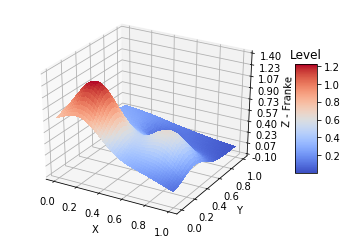

In [35]:
x_d_Ridge, y_d_Ridge, z_d_Ridge = FindData(X , Y) 
print(x_d_Ridge.shape)
plotSurface(x_d_Ridge, y_d_Ridge, z_d_Ridge) 

In [36]:
x_Ridge, y_Ridge, z_Ridge, m = convertData(x_d_Ridge, y_d_Ridge, z_d_Ridge)
print(n)
print(m)
xyb_Ridge = XY(x_Ridge, y_Ridge) 
betaRidge = beta_model('Ridge', xyb_Ridge, z_Ridge)

250
62500


In [37]:
zpredict_Ridge, zpredict_Ridge_mesh = predict(xyb_Ridge ,betaRidge, n)
print(zpredict_Ridge_mesh.shape)

(250, 250)


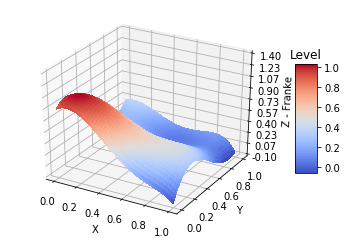

In [38]:
# Plot the predicted surface.
plotSurface(x_d_Ridge, y_d_Ridge, zpredict_Ridge_mesh)

In [39]:
print(confidenceIntervall(z_Ridge, zpredict_Ridge, m, 5, xyb_Ridge, betaRidge ))

(array([[ 0.88636603],
       [ 1.0834995 ],
       [ 1.40390196],
       [-6.64179612],
       [ 1.01375842],
       [-6.00033513],
       [ 4.18671518],
       [ 1.77602348],
       [-1.31413489],
       [ 2.02521662],
       [ 4.11764721],
       [ 0.69398982],
       [ 0.98765134],
       [-0.6771815 ],
       [ 4.06261958],
       [-3.71558518],
       [-1.99757225],
       [ 0.58162334],
       [-1.04349527],
       [ 0.52127009],
       [-2.00947876]]), array([[0.00470527],
       [0.0523949 ],
       [0.0523949 ],
       [0.25254405],
       [0.19732672],
       [0.25254405],
       [0.56794533],
       [0.42129189],
       [0.42129189],
       [0.56794533],
       [0.59482148],
       [0.45461977],
       [0.42319039],
       [0.45461977],
       [0.59482148],
       [0.23419229],
       [0.20379908],
       [0.19886844],
       [0.19886844],
       [0.20379908],
       [0.23419229]]), array([[ 0.88166076,  0.8910713 ],
       [ 1.0311046 ,  1.13589439],
       [ 1.35150706,  

In [40]:
# Regner ut gjennomsnittsverdien, variansen, mean squared error og standardavviket 
z_mean_Ridge = mu(z_Ridge,m)
print(z_mean_Ridge)   
#print(m)
var_z_Ridge = calc_Variance(z_Ridge,z_mean_Ridge,m)
print(var_z_Ridge)        
MSE_Ridge = MSE(z_Ridge, zpredict_Ridge, m)
print(MSE_Ridge)      
R_2_Ridge = calc_R_2(z_Ridge, zpredict_Ridge, z_mean_Ridge, m)
print(R_2_Ridge)

0.40846842352769225
[0.08252045]
[3.14257909e-06]
[0.99996192]


In [41]:
mse_R, R_2_R, biasModel_R, var_R, beta_confInt_R = test(x_Ridge, y_Ridge, z_Ridge, 'Ridge')

print('Mean squared error: ', mse_R)
print('R 2- score: ', R_2_R)
print('bias for the model ', biasModel_R) 
print('Variancen for the model: ', var_R)
print('beta Confidence Intervall: \n', beta_confInt_R)

Mean squared error:  0.005374605982416148
R 2- score:  0.9976696731000213
bias for the model  0.08294866554039199
Variancen for the model:  0.07536620212292003
beta Confidence Intervall: 
 [[ 0.92950577  0.93270011]
 [ 0.69138179  0.72759509]
 [ 1.12476217  1.16015103]
 [-5.64163751 -5.46733002]
 [ 1.14186857  1.27772819]
 [-5.33270388 -5.16093196]
 [ 3.25930043  3.6511494 ]
 [ 1.30653459  1.59855221]
 [-1.42783867 -1.14013046]
 [ 1.37352991  1.76215304]
 [ 3.27116704  3.68204571]
 [ 0.68291242  0.99786346]
 [ 0.42993152  0.72232514]
 [-0.64127428 -0.33098512]
 [ 3.14868622  3.5572587 ]
 [-3.17770358 -3.01559004]
 [-1.85333798 -1.7119396 ]
 [ 0.31360048  0.45166426]
 [-0.64508676 -0.50820571]
 [ 0.1961878   0.33563068]
 [-1.43803699 -1.27678211]]


#### Endrer datasett til trening og test sett:

In [42]:
total_MSE, total_R_2, totVarianceModel , beta_confInt, biasModel = test_k_fold(x_Ridge, y_Ridge, z_Ridge, 3, 'Ridge')

0.15464455213882938
0.07311539697931983
0.15490311557347658
0.07337412532291991
0.15483413077428523
0.0733048499760539


In [43]:
print('Mean squared error: ', total_MSE)
print('R 2- score: ', total_R_2)
print('bias for the model ', biasModelk) 
print('Variancen for the model: ', totVarianceModel)
print('beta Confidence Intervall: \n', beta_confInt)

Mean squared error:  0.15479393282886375
R 2- score:  0.9793053325684656
bias for the model  [[0.16325377]
 [0.16324301]
 [0.16311486]]
Variancen for the model:  0.07326479075943121
beta Confidence Intervall: 
 [[ 9.44524287e-01  9.54284752e-01]
 [ 4.49960628e-01  5.58643014e-01]
 [ 9.51719555e-01  1.06092601e+00]
 [-5.09026246e+00 -4.56620999e+00]
 [ 1.02101437e+00  1.43053950e+00]
 [-5.04556882e+00 -4.51897710e+00]
 [ 2.32527045e+00  3.50380236e+00]
 [ 8.77070415e-01  1.75371433e+00]
 [-1.64460681e+00 -7.68127330e-01]
 [ 6.59011732e-01  1.84256782e+00]
 [ 2.39382146e+00  3.62888390e+00]
 [ 3.99932615e-01  1.34659229e+00]
 [-1.05241942e-02  8.69127868e-01]
 [-8.68472711e-01  7.79735860e-02]
 [ 2.28134936e+00  3.52070840e+00]
 [-2.86765734e+00 -2.38094966e+00]
 [-1.81753331e+00 -1.39282469e+00]
 [-4.55955098e-03  4.10917962e-01]
 [-5.22202976e-01 -1.05707214e-01]
 [-1.26516806e-01  2.98925546e-01]
 [-1.15195977e+00 -6.63737931e-01]]


#### Finn bias og variansen for modellene. 

In [44]:
bias2 = bias(z_Ridge, zpredict_Ridge, m)
print(bias2)
varianceModel = var2(zpredict_Ridge, m)
print(varianceModel)

0.08252044507704533
0.0748957693810862


## Part c) Lasso 

(250, 250)


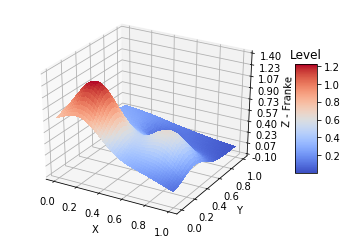

In [45]:
# Oppretter meshgrid av datasettet 
x_d_Lasso, y_d_Lasso, z_d_Lasso = FindData(X , Y) 
print(x_d_Lasso.shape)
# Plotter z_d med meshgrid av x og y
plotSurface(x_d_Lasso, y_d_Lasso, z_d_Lasso) 

In [46]:
# Konverterer meshgrid til kolonnevektorer
x_Lasso, y_Lasso, z_Lasso, m = convertData(x_d_Lasso, y_d_Lasso, z_d_Lasso)
print(n)
print(m)
# Oppretter independent variabel matrise av x og y vektorene
Lasso_multi = np.c_[x_Lasso, y_Lasso]
#print (Lasso_multi)

250
62500


In [47]:
# Bruker sklearn for å finne Lasso-modell. Bruker PolynomialFeatures for ikke lineær funksjon
poly2 = PolynomialFeatures(degree=10)

# Transformerer variabelmatrisen 
Lasso_sklearn = poly2.fit_transform(Lasso_multi)
print(Lasso_sklearn)
#print(z_Lasso)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.004      0.         ... 0.         0.         0.        ]
 [1.         0.008      0.         ... 0.         0.         0.        ]
 ...
 [1.         0.988      0.996      ... 0.94534122 0.95299581 0.96071237]
 [1.         0.992      0.996      ... 0.9530113  0.95685409 0.96071237]
 [1.         0.996      0.996      ... 0.96071237 0.96071237 0.96071237]]


In [48]:
# Beregner Lasso modell 
lasso=linear_model.Lasso(alpha=0.001)
lasso.fit(Lasso_sklearn, z_Lasso) 

# beregner forventet z-verdier av x og y verdier
predictLasso = lasso.predict(Lasso_sklearn)

print("Lasso Coefficient: ", lasso.coef_)
print("Lasso Intercept: ", lasso.intercept_)

Lasso Coefficient:  [ 0.         -0.65491407 -0.         -0.15778774  0.12229035 -1.22730824
 -0.          0.52630547  0.         -0.         -0.          0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.36004502
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.20428755 -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.        ]
Lasso Intercept:  [1.00979497]


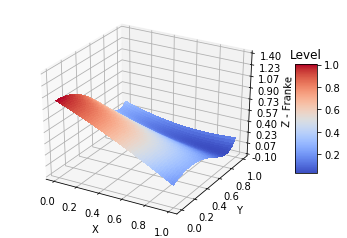

In [49]:
# Plotter forventet overflate med Lasso modellen 
predict_mesh_Lasso = predictLasso.reshape(n,n)
plotSurface(x_d_Lasso, y_d_Lasso, predict_mesh_Lasso)

Kommentar til Lasso: 
Ser at ved å endre på alpha til veldig liten så begynner Lasso og ligne mer og mer på originale surfacen. 
ved alpha = 0.1 så synes bare et grått plan. 
Koeffisientene endres også ved å endre på alpha. Det samme med intercept. 

In [50]:
k_fold_Lasso(x_Lasso, y_Lasso, z_Lasso, 4, 0.001)

(46875, 3)
(46875, 3)
(46875, 3)
(46875, 3)


(0.012867664461539013, 0.743628760482914)

## Part d) 

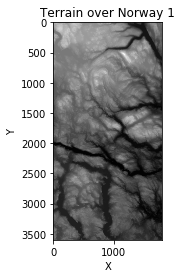

In [51]:
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('Data/SRTM_data_Norway_1.tif')
#terrain1 = imread('Data/SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

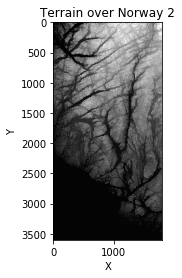

In [52]:
# Load the terrain
terrain2 = imread('Data/SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 2')
plt.imshow(terrain2, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Part e) 

In [53]:
# Velg ett område, f.eks 100x100 som tilsvarer X og Y. se på intensiteten på bildet. 

patch 1, from (1466, 886) to (2266, 1286)
mse: 38484.4
R2: 0.533812
variance: 44066.8
bias: 82551.2

patch 2, from (1062, 499) to (1862, 899)
mse: 11912.9
R2: 0.44506
variance: 9554.11
bias: 21467

patch 3, from (2552, 859) to (3352, 1259)
mse: 7394.8
R2: 0.77824
variance: 25951.1
bias: 33345.9

patch 4, from (962, 967) to (1762, 1367)
mse: 37333
R2: 0.416821
variance: 26683.4
bias: 64016.4

patch 5, from (183, 934) to (983, 1334)
mse: 35475.5
R2: 0.334222
variance: 17808.8
bias: 53284.3

The whole dataset
mse: 42617.3
R2: 0.537315
variance: 49491.5
bias: 92108.8



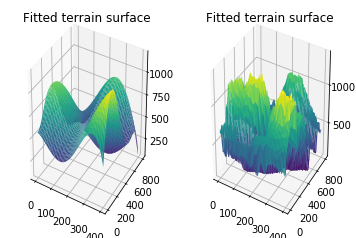

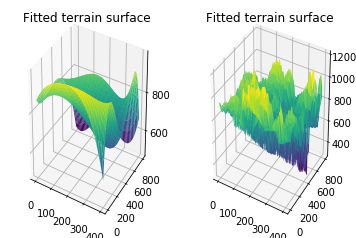

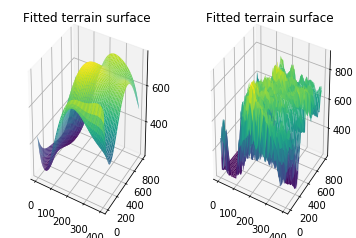

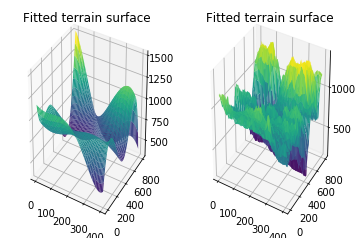

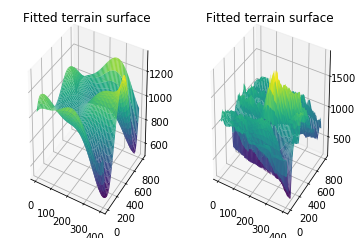

In [54]:
# Kode fra Kristine 

import numpy as np
#from scipy.misc import imread
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def surface_plot(surface,title, surface1=None):
    M,N = surface.shape

    ax_rows = np.arange(M)
    ax_cols = np.arange(N)

    [X,Y] = np.meshgrid(ax_cols, ax_rows)

    fig = plt.figure()
    if surface1 is not None:
        ax = fig.add_subplot(1,2,1,projection='3d')
        ax.plot_surface(X,Y,surface,cmap=cm.viridis,linewidth=0)
        plt.title(title)

        ax = fig.add_subplot(1,2,2,projection='3d')
        ax.plot_surface(X,Y,surface1,cmap=cm.viridis,linewidth=0)
        plt.title(title)
    else:
        ax = fig.gca(projection='3d')
        ax.plot_surface(X,Y,surface,cmap=cm.viridis,linewidth=0)
        plt.title(title)


def predict(rows, cols, beta):
    out = np.zeros((np.size(rows), np.size(cols)))

    for i,y_ in enumerate(rows):
        for j,x_ in enumerate(cols):
            data_vec = np.array([1, x_, y_, x_**2, x_*y_, y_**2, \
                                x_**3, x_**2*y_, x_*y_**2, y_**3, \
                                x_**4, x_**3*y_, x_**2*y_**2, x_*y_**3,y_**4, \
                                x_**5, x_**4*y_, x_**3*y_**2, x_**2*y_**3,x_*y_**4,y_**5])#,\
                            #    x_**6, x_**5*y_, x_**4*y_**2, x_**3*y_**3,x_**2*y_**4, x_*y_**5, y_**6, \
                            #    x_**7, x_**6*y_, x_**5*y_**2, x_**4*y_**3,x_**3*y_**4, x_**2*y_**5, x_*y_**6, y_**7, \
                            #    x_**8, x_**7*y_, x_**6*y_**2, x_**5*y_**3,x_**4*y_**4, x_**3*y_**5, x_**2*y_**6, x_*y_**7,y_**8, \
                            #    x_**9, x_**8*y_, x_**7*y_**2, x_**6*y_**3,x_**5*y_**4, x_**4*y_**5, x_**3*y_**6, x_**2*y_**7,x_*y_**8, y_**9])
            out[i,j] = data_vec @ beta

    return out

from sklearn.metrics import mean_squared_error

if __name__ == '__main__':

    # Load the terrain
    terrain1 = imread('data/SRTM_data_Norway_1.tif')
    [n,m] = terrain1.shape

    ## Find some random patches within the dataset and perform a fit

    #patch_size_row = 100
    #patch_size_col = 50

    patch_size_row = 800
    patch_size_col = 400
    
    # Define their axes
    rows = np.linspace(0,1,patch_size_row)
    cols = np.linspace(0,1,patch_size_col)

    [C,R] = np.meshgrid(cols,rows)

    x = C.reshape(-1,1)
    y = R.reshape(-1,1)

    num_data = patch_size_row*patch_size_col

    # Find the start indices of each patch

    num_patches = 5

    np.random.seed(4155)

    row_starts = np.random.randint(0,n-patch_size_row,num_patches)
    col_starts = np.random.randint(0,m-patch_size_col,num_patches)

    for i,row_start, col_start in zip(np.arange(num_patches),row_starts, col_starts):
        row_end = row_start + patch_size_row
        col_end = col_start + patch_size_col

        patch = terrain1[row_start:row_end, col_start:col_end]

        z = patch.reshape(-1,1)

        # Perform OLS fit
        data = np.c_[np.ones((num_data,1)), x, y, \
                     x**2, x*y, y**2, \
                     x**3, x**2*y, x*y**2, y**3, \
                     x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                     x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]#, \
                     #x**6, x**5*y, x**4*y**2, x**3*y**3,x**2*y**4, x*y**5, y**6, \
                     #x**7, x**6*y, x**5*y**2, x**4*y**3,x**3*y**4, x**2*y**5, x*y**6, y**7, \
                     #x**8, x**7*y, x**6*y**2, x**5*y**3,x**4*y**4, x**3*y**5, x**2*y**6, x*y**7,y**8, \
                     #x**9, x**8*y, x**7*y**2, x**6*y**3,x**5*y**4, x**4*y**5, x**3*y**6, x**2*y**7,x*y**8, y**9]

        beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

        fitted_patch = predict(rows, cols, beta_ols)

        mse = np.sum( (fitted_patch - patch)**2 )/num_data
        R2 = 1 - np.sum( (fitted_patch - patch)**2 )/np.sum( (patch - np.mean(patch))**2 )
        var = np.sum( (fitted_patch - np.mean(fitted_patch))**2 )/num_data
        bias = np.sum( (patch - np.mean(fitted_patch))**2 )/num_data

        print("patch %d, from (%d, %d) to (%d, %d)"%(i+1, row_start, col_start, row_end,col_end))
        print("mse: %g\nR2: %g"%(mse, R2))
        print("variance: %g"%var)
        print("bias: %g\n"%bias)

        surface_plot(fitted_patch,'Fitted terrain surface',patch)

    # Perform fit over the whole dataset
    print("The whole dataset")

    rows = np.linspace(0,1,n)
    cols = np.linspace(0,1,m)

    [C,R] = np.meshgrid(cols,rows)

    x = C.reshape(-1,1)
    y = R.reshape(-1,1)

    num_data = n*m

    data = np.c_[np.ones((num_data,1)), x, y, \
                 x**2, x*y, y**2, \
                 x**3, x**2*y, x*y**2, y**3, \
                 x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                 x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]

    z = terrain1.flatten()
    
    beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

    fitted_terrain = predict(rows, cols, beta_ols)

    mse = np.sum( (fitted_terrain - terrain1)**2 )/num_data
    R2 = 1 - np.sum( (fitted_terrain - terrain1)**2 )/np.sum( (terrain1- np.mean(terrain1))**2 )
    var = np.sum( (fitted_terrain - np.mean(fitted_terrain))**2 )/num_data
    bias = np.sum( (terrain1 - np.mean(fitted_terrain))**2 )/num_data

    print("mse: %g\nR2: %g"%(mse, R2))
    print("variance: %g"%var)
    print("bias: %g\n"%bias)

    plt.show()